In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patheffects as patheffects

In [2]:
df = pd.read_csv('../../output/cross/crossmis.csv')

# permute all xxx_1 and xxx_2 columns
df = df.rename(columns={col: col.replace(' 1', ' 2') for col in df.columns if '1' in col} | {col: col.replace(' 2', ' 1') for col in df.columns if '2' in col})

df = df.rename(columns={"summary_1": "summary_2", "summary_2": "summary_1"})


display(df)
df = df.groupby(['metadata/Model name 1', 'metadata/Model name 2']).nth(0).reset_index()



,Unnamed: 0,summary_2,summary_1,metadata/Embedding model,metadata/Decoding config 2,metadata/Date 2,metadata/Model name 2,metadata/Dataset name 2,metadata/Decoding config 1,metadata/Date 1,metadata/Model name 1,I(summary_1 -> summary_2),H(summary_2),H(summary_2|summary_1)
0,0,airKlizz_mt5-base-wikinewssum-all-languages-_-...,sshleifer_distilbart-xsum-12-1-_-cnn_dailymail...,paraphrase-MiniLM-L6-v2,beam_sampling_100,2023-11-15-17-52-47,airKlizz_mt5-base-wikinewssum-all-languages,cnn_dailymail,beam_sampling_100,2023-11-15-02-38-06,sshleifer_distilbart-xsum-12-1,53.351122,52.664748,-0.686374
1,0,sshleifer_distilbart-cnn-12-3-_-cnn_dailymail-...,airKlizz_mt5-base-wikinewssum-all-languages-_-...,paraphrase-MiniLM-L6-v2,beam_sampling_100,2023-11-15-01-30-06,sshleifer_distilbart-cnn-12-3,cnn_dailymail,beam_sampling_100,2023-11-15-17-52-47,airKlizz_mt5-base-wikinewssum-all-languages,53.847538,46.205639,-7.641900
2,0,facebook_bart-large-cnn-_-cnn_dailymail-_-beam...,google_pegasus-multi_news-_-cnn_dailymail-_-be...,paraphrase-MiniLM-L6-v2,beam_sampling_100,2023-11-15-00-41-38,facebook_bart-large-cnn,cnn_dailymail,beam_sampling_100,2023-11-14-23-36-13,google_pegasus-multi_news,55.678656,46.537664,-9.140992
3,0,sshleifer_distilbart-cnn-12-6-_-cnn_dailymail-...,Falconsai_medical_summarization-_-cnn_dailymai...,paraphrase-MiniLM-L6-v2,beam_sampling_100,2023-11-15-03-03-16,sshleifer_distilbart-cnn-12-6,cnn_dailymail,beam_sampling_100,2023-11-15-18-40-37,Falconsai_medical_summarization,54.565217,46.315568,-8.249649
4,0,sshleifer_distilbart-xsum-12-1-_-cnn_dailymail...,sshleifer_distill-pegasus-xsum-16-4-_-cnn_dail...,paraphrase-MiniLM-L6-v2,beam_sampling_100,2023-11-15-02-38-06,sshleifer_distilbart-xsum-12-1,cnn_dailymail,beam_sampling_100,2023-11-15-01-58-14,sshleifer_distill-pegasus-xsum-16-4,77.152555,101.686819,24.534264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0,sshleifer_distilbart-xsum-6-6-_-cnn_dailymail-...,Falconsai_text_summarization-_-cnn_dailymail-_...,paraphrase-MiniLM-L6-v2,beam_sampling_100,2023-11-15-02-22-27,sshleifer_distilbart-xsum-6-6,cnn_dailymail,beam_sampling_100,2023-11-15-18-05-42,Falconsai_text_summarization,75.791941,92.091482,16.299541
206,0,google_pegasus-multi_news-_-cnn_dailymail-_-be...,sshleifer_distilbart-cnn-12-3-_-cnn_dailymail-...,paraphrase-MiniLM-L6-v2,beam_sampling_100,2023-11-14-23-36-13,google_pegasus-multi_news,cnn_dailymail,beam_sampling_100,2023-11-15-01-30-06,sshleifer_distilbart-cnn-12-3,50.460714,38.206337,-12.254377
207,0,sshleifer_distilbart-cnn-12-6-_-cnn_dailymail-...,google_pegasus-arxiv-_-cnn_dailymail-_-beam_sa...,paraphrase-MiniLM-L6-v2,beam_sampling_100,2023-11-15-01-45-56,sshleifer_distilbart-cnn-12-6,cnn_dailymail,beam_sampling_100,2023-11-15-00-21-24,google_pegasus-arxiv,43.618137,46.446095,2.827958
208,0,google_pegasus-arxiv-_-cnn_dailymail-_-beam_sa...,sshleifer_distilbart-cnn-12-6-_-cnn_dailymail-...,paraphrase-MiniLM-L6-v2,beam_sampling_100,2023-11-15-00-21-24,google_pegasus-arxiv,cnn_dailymail,beam_sampling_100,2023-11-15-01-45-56,sshleifer_distilbart-cnn-12-6,46.762778,48.452540,1.689761


In [3]:
df
# for each group get only firt row


,metadata/Model name 1,metadata/Model name 2,Unnamed: 0,summary_2,summary_1,metadata/Embedding model,metadata/Decoding config 2,metadata/Date 2,metadata/Dataset name 2,metadata/Decoding config 1,metadata/Date 1,I(summary_1 -> summary_2),H(summary_2),H(summary_2|summary_1)
0,Falconsai_medical_summarization,Falconsai_text_summarization,0,Falconsai_text_summarization-_-cnn_dailymail-_...,Falconsai_medical_summarization-_-cnn_dailymai...,paraphrase-MiniLM-L6-v2,beam_sampling_100,2023-11-15-18-05-42,cnn_dailymail,beam_sampling_100,2023-11-15-18-40-37,53.972989,47.096134,-6.876856
1,Falconsai_medical_summarization,airKlizz_mt5-base-wikinewssum-all-languages,0,airKlizz_mt5-base-wikinewssum-all-languages-_-...,Falconsai_medical_summarization-_-cnn_dailymai...,paraphrase-MiniLM-L6-v2,beam_sampling_100,2023-11-15-17-52-47,cnn_dailymail,beam_sampling_100,2023-11-15-18-40-37,56.831122,52.679438,-4.151685
2,Falconsai_medical_summarization,facebook_bart-large-cnn,0,facebook_bart-large-cnn-_-cnn_dailymail-_-beam...,Falconsai_medical_summarization-_-cnn_dailymai...,paraphrase-MiniLM-L6-v2,beam_sampling_100,2023-11-15-00-41-38,cnn_dailymail,beam_sampling_100,2023-11-15-18-40-37,54.313585,46.547646,-7.765939
3,Falconsai_medical_summarization,google_pegasus-arxiv,0,google_pegasus-arxiv-_-cnn_dailymail-_-beam_sa...,Falconsai_medical_summarization-_-cnn_dailymai...,paraphrase-MiniLM-L6-v2,beam_sampling_100,2023-11-15-00-21-24,cnn_dailymail,beam_sampling_100,2023-11-15-18-40-37,47.188219,48.443666,1.255446
4,Falconsai_medical_summarization,google_pegasus-large,0,google_pegasus-large-_-cnn_dailymail-_-beam_sa...,Falconsai_medical_summarization-_-cnn_dailymai...,paraphrase-MiniLM-L6-v2,beam_sampling_100,2023-11-14-23-06-39,cnn_dailymail,beam_sampling_100,2023-11-15-18-40-37,48.426027,43.062326,-5.363700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,sshleifer_distill-pegasus-xsum-16-4,sshleifer_distilbart-cnn-12-6,0,sshleifer_distilbart-cnn-12-6-_-cnn_dailymail-...,sshleifer_distill-pegasus-xsum-16-4-_-cnn_dail...,paraphrase-MiniLM-L6-v2,beam_sampling_100,2023-11-15-01-45-56,cnn_dailymail,beam_sampling_100,2023-11-15-01-58-14,47.385403,46.281756,-1.103646
179,sshleifer_distill-pegasus-xsum-16-4,sshleifer_distilbart-cnn-6-6,0,sshleifer_distilbart-cnn-6-6-_-cnn_dailymail-_...,sshleifer_distill-pegasus-xsum-16-4-_-cnn_dail...,paraphrase-MiniLM-L6-v2,beam_sampling_100,2023-11-15-01-02-35,cnn_dailymail,beam_sampling_100,2023-11-15-01-58-14,48.650362,50.169648,1.519286
180,sshleifer_distill-pegasus-xsum-16-4,sshleifer_distilbart-xsum-12-1,0,sshleifer_distilbart-xsum-12-1-_-cnn_dailymail...,sshleifer_distill-pegasus-xsum-16-4-_-cnn_dail...,paraphrase-MiniLM-L6-v2,beam_sampling_100,2023-11-15-02-38-06,cnn_dailymail,beam_sampling_100,2023-11-15-01-58-14,77.152555,101.686819,24.534264
181,sshleifer_distill-pegasus-xsum-16-4,sshleifer_distilbart-xsum-6-6,0,sshleifer_distilbart-xsum-6-6-_-cnn_dailymail-...,sshleifer_distill-pegasus-xsum-16-4-_-cnn_dail...,paraphrase-MiniLM-L6-v2,beam_sampling_100,2023-11-15-02-22-27,cnn_dailymail,beam_sampling_100,2023-11-15-01-58-14,72.853391,92.093927,19.240536


/tmp/ipykernel_57481/341495912.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table = df.dropna().pivot("metadata/Model name 1", "metadata/Model name 2", "I(summary_1 -> summary_2)").fillna(-1)


metadata/Model name 2,Falconsai_medical_summarization,Falconsai_text_summarization,airKlizz_mt5-base-wikinewssum-all-languages,facebook_bart-large-cnn,google_pegasus-arxiv,google_pegasus-large,google_pegasus-multi_news,sshleifer_distilbart-cnn-12-3,sshleifer_distilbart-cnn-12-6,sshleifer_distilbart-cnn-6-6,sshleifer_distilbart-xsum-12-1,sshleifer_distilbart-xsum-6-6,sshleifer_distill-pegasus-cnn-16-4,sshleifer_distill-pegasus-xsum-16-4
metadata/Model name 1,,,,,,,,,,,,,,
Falconsai_medical_summarization,-1.000000,53.972989,56.831122,54.313585,47.188219,48.426027,48.623212,53.726181,54.565217,55.776972,82.409597,76.677091,56.756209,81.594767
Falconsai_text_summarization,52.579986,-1.000000,57.052712,56.679801,46.511224,50.354853,49.252555,56.340724,57.023426,58.883159,82.286862,75.791941,59.737651,82.284722
airKlizz_mt5-base-wikinewssum-all-languages,51.214066,53.002171,-1.000000,54.146422,45.808078,48.046857,48.759790,53.847538,54.315183,56.084801,81.819494,75.976306,56.963974,82.135640
facebook_bart-large-cnn,52.131226,55.675007,57.562263,-1.000000,46.161186,50.752056,50.491463,60.979233,62.633139,63.199445,83.850631,76.919174,63.863971,81.633797
google_pegasus-arxiv,41.424070,43.550992,47.521342,44.409454,-1.000000,40.197428,41.362560,45.253071,43.529941,45.545056,71.647936,66.224277,46.371774,73.132472
google_pegasus-large,50.751840,53.911830,56.048070,55.221339,46.862733,-1.000000,48.698703,54.931088,55.175591,56.869335,81.869828,75.451935,58.085306,82.075581
google_pegasus-multi_news,51.182017,53.459811,57.238612,55.678656,46.925577,49.061545,-1.000000,55.105080,55.761579,57.086407,83.996455,76.633696,58.472569,83.688538
sshleifer_distilbart-cnn-12-3,51.985551,56.178575,57.660276,61.447334,46.560980,50.662502,50.460714,-1.000000,62.436614,62.772165,83.506951,77.165866,63.665489,83.129076
sshleifer_distilbart-cnn-12-6,52.059651,56.175126,57.728139,62.566974,46.510722,50.750343,50.670830,62.374016,65.877205,63.498632,83.481322,77.417398,64.014852,82.880749


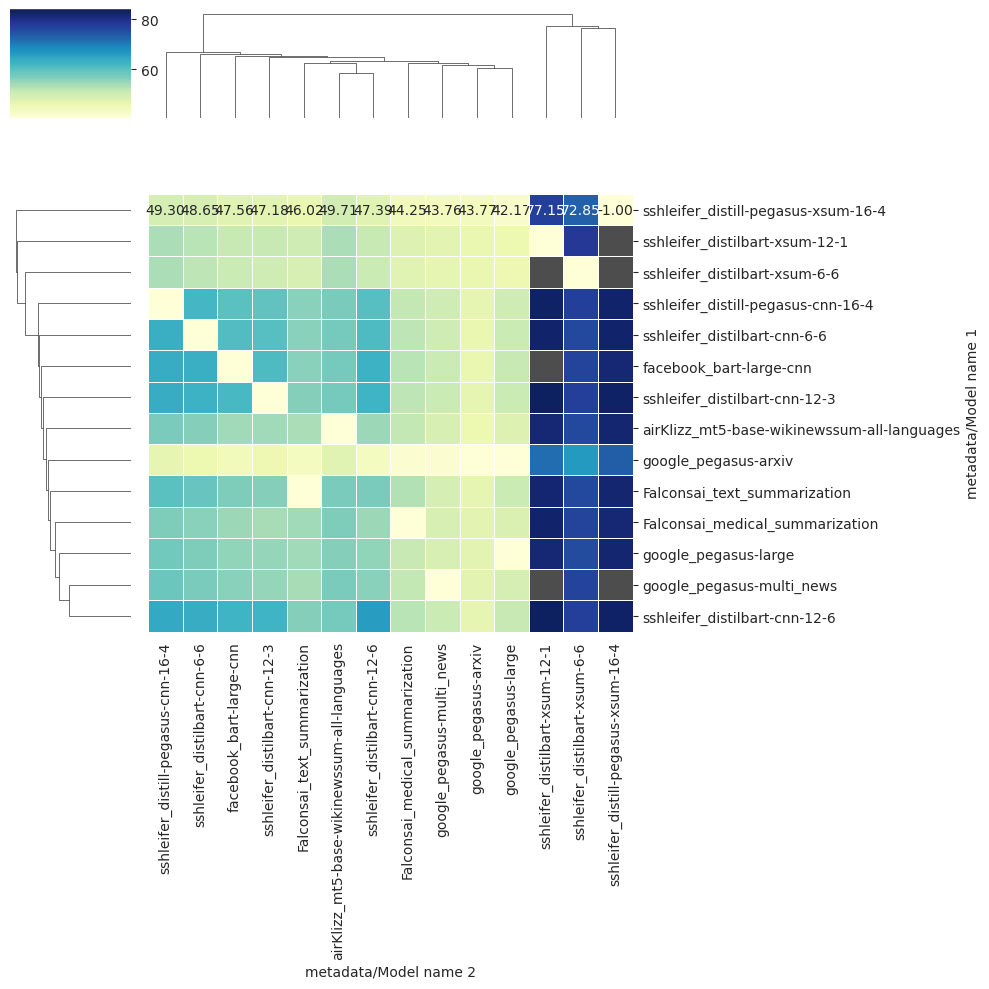

In [4]:

# make a custom palette where 0 is gray and everything else is a gradient following the YlGnBu palette
palette = sns.color_palette("YlGnBu", 100)
palette[-1] = (0.3, 0.3, 0.3, 1.0)


# create heat map table
table = df.dropna().pivot("metadata/Model name 1", "metadata/Model name 2", "I(summary_1 -> summary_2)").fillna(-1)

display(table)
# get min that is not 0
min_val = table[table > 0].min().min()

g = sns.clustermap(table, annot=True, fmt=".2f", linewidths=.5, cmap=palette, vmin=min_val)

# add title

# save figure
path = f"../../../papers/Mutual-information-for-summarization/img/crossmis.png"
plt.tight_layout()
plt.savefig(path, bbox_inches='tight', dpi=300)

# sns.heatmap(data=df, x="metadata/Model name 1", y="metadata/Model name 2", value, annot=True, fmt=".2f", linewidths=.5, cmap="YlGnBu")


/tmp/ipykernel_57481/1246241173.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table = df.dropna().pivot("metadata/Model name 1", "metadata/Model name 2", "I(summary_1 -> summary_2)").fillna(-0.0)


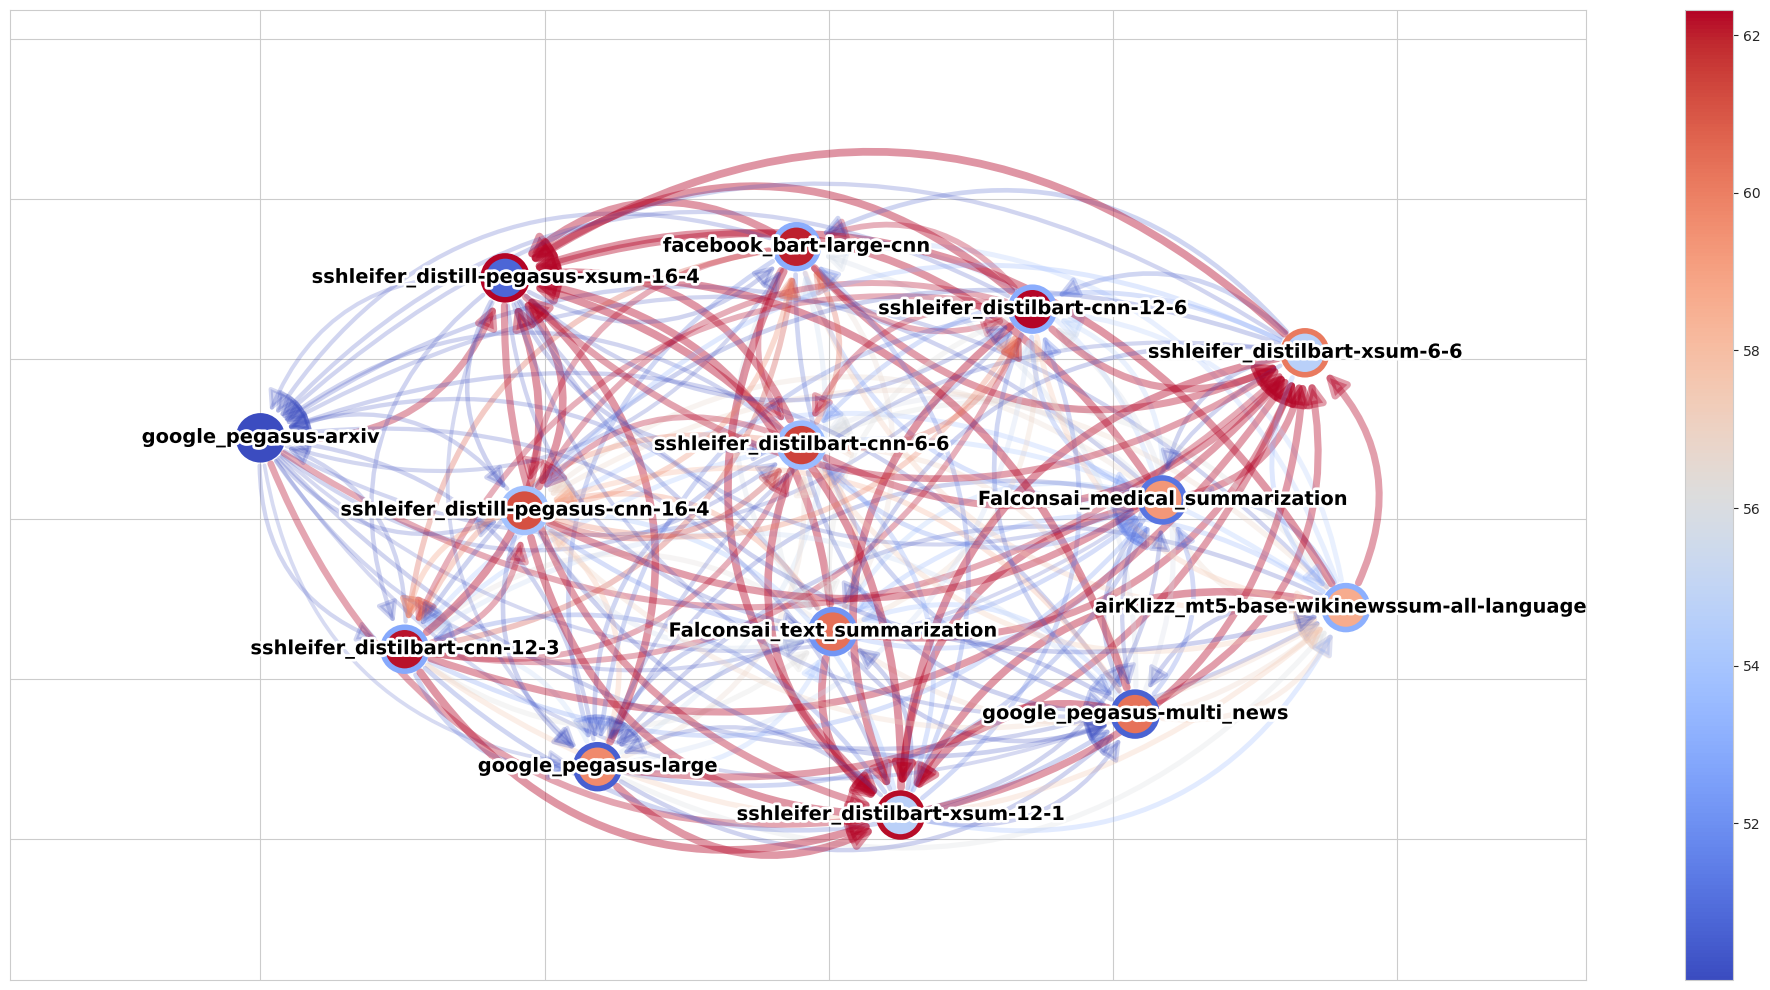

In [5]:
# plot graph of models

# make grid dark background
sns.set_style("whitegrid")

cmap =sns.color_palette("coolwarm", as_cmap=True)


table = df.dropna().pivot("metadata/Model name 1", "metadata/Model name 2", "I(summary_1 -> summary_2)").fillna(-0.0)
# remove lines and columns containing xsum in index and columns

# compute 1/x for each value

G= nx.from_pandas_adjacency(table, create_using=nx.DiGraph)
G.remove_edges_from(nx.selfloop_edges(G))




avg_weight = {n : np.mean([d[2]['weight'] for d in G.out_edges(n, data=True)]) for n in G.nodes()}
avg_income = {n : np.mean([d[2]['weight'] for d in G.in_edges(n, data=True)]) for n in G.nodes()}
# remove edge with weighht <= 50
# for edge in list(G.edges(data=True)):
#     if edge[2]['weight'] >= 1/55:
#         G.remove_edge(edge[0], edge[1])


layout = nx.spring_layout(G, k=0.9, iterations=100)
fig, ax = plt.subplots(figsize=(20, 10))

def make_border_color(strength, cmap, vmin, vmax):
    return cmap((strength - vmin) / (vmax - vmin))
    

# draw nodes with border color based on avg_income
nx.draw_networkx_nodes(G, layout, node_size=1000, node_color=list(avg_weight.values()), cmap=cmap, vmin=min(avg_weight.values()), vmax=max(avg_weight.values()), ax=ax, linewidths=4, edgecolors=[make_border_color(avg_income[n], cmap, min(avg_income.values()), max(avg_income.values())) for n in G.nodes()])


nx.draw_networkx_edges(G, layout, width=[d[2]['weight']/15 for d in G.edges(data=True)], edge_color=[d[2]['weight'] for d in G.edges(data=True)], edge_cmap=cmap, edge_vmin=min(avg_weight.values()), edge_vmax=max(avg_weight.values()), ax=ax, arrowsize=30, arrowstyle='-|>', alpha=[d[2]['weight']/200 for d in G.edges(data=True)], connectionstyle='arc3, rad = 0.4', min_source_margin=20, min_target_margin=20)

nx.draw_networkx_labels(G, layout, font_size=14, font_color='black', font_weight='bold', ax=ax)




# add cmap legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(avg_weight.values()), vmax=max(avg_weight.values())))
sm._A = []
plt.colorbar(sm, ax=plt.gca())

# add white contour to all texts in the figure
for text in plt.gca().texts:
    text.set_path_effects([patheffects.Stroke(linewidth=4, foreground='white'), patheffects.Normal()])
    
plt.tight_layout()
axis = plt.gca()
axis.set_xlim([1.2*x for x in axis.get_xlim()])
axis.set_ylim([1.2*y for y in axis.get_ylim()])
plt.tight_layout()
# save figure
path = f"../../../papers/Mutual-information-for-summarization/img/crossmisgraph.png"
plt.tight_layout()
plt.savefig(path, bbox_inches='tight', dpi=300)






In [6]:
def central_community_layout(G, threshold=58):

    avg_weight = {n : np.mean([d[2]['weight'] for d in G.out_edges(n, data=True)]) for n in G.nodes()}
    avg_income = {n : np.mean([d[2]['weight'] for d in G.in_edges(n, data=True)]) for n in G.nodes()}
    
    # group the nodes with avg_weight > threshold and the rest
    # get the subgraph of nodes with avg_weight > threshold
    subgraph = G.subgraph([n for n in G.nodes() if avg_weight[n] > threshold])
    # get the subgraph of nodes with avg_weight <= threshold
    subgraph2 = G.subgraph([n for n in G.nodes() if avg_weight[n] <= threshold])
    
    # get the position of the nodes in the subgraph
    pos = nx.circular_layout(subgraph, scale=0.5, center=(0, 0))
    
    # get the position of the nodes in the subgraph2
    pos2 = nx.circular_layout(subgraph2, scale=1.5, center=(0, 0))
    
    # get the position of the nodes in the original graph
    pos = {n : pos[n] if n in pos else pos2[n] for n in G.nodes()}
    
    return pos

/tmp/ipykernel_57481/661474924.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table = df.dropna().pivot("metadata/Model name 1", "metadata/Model name 2", "I(summary_1 -> summary_2)").fillna(-0.0)


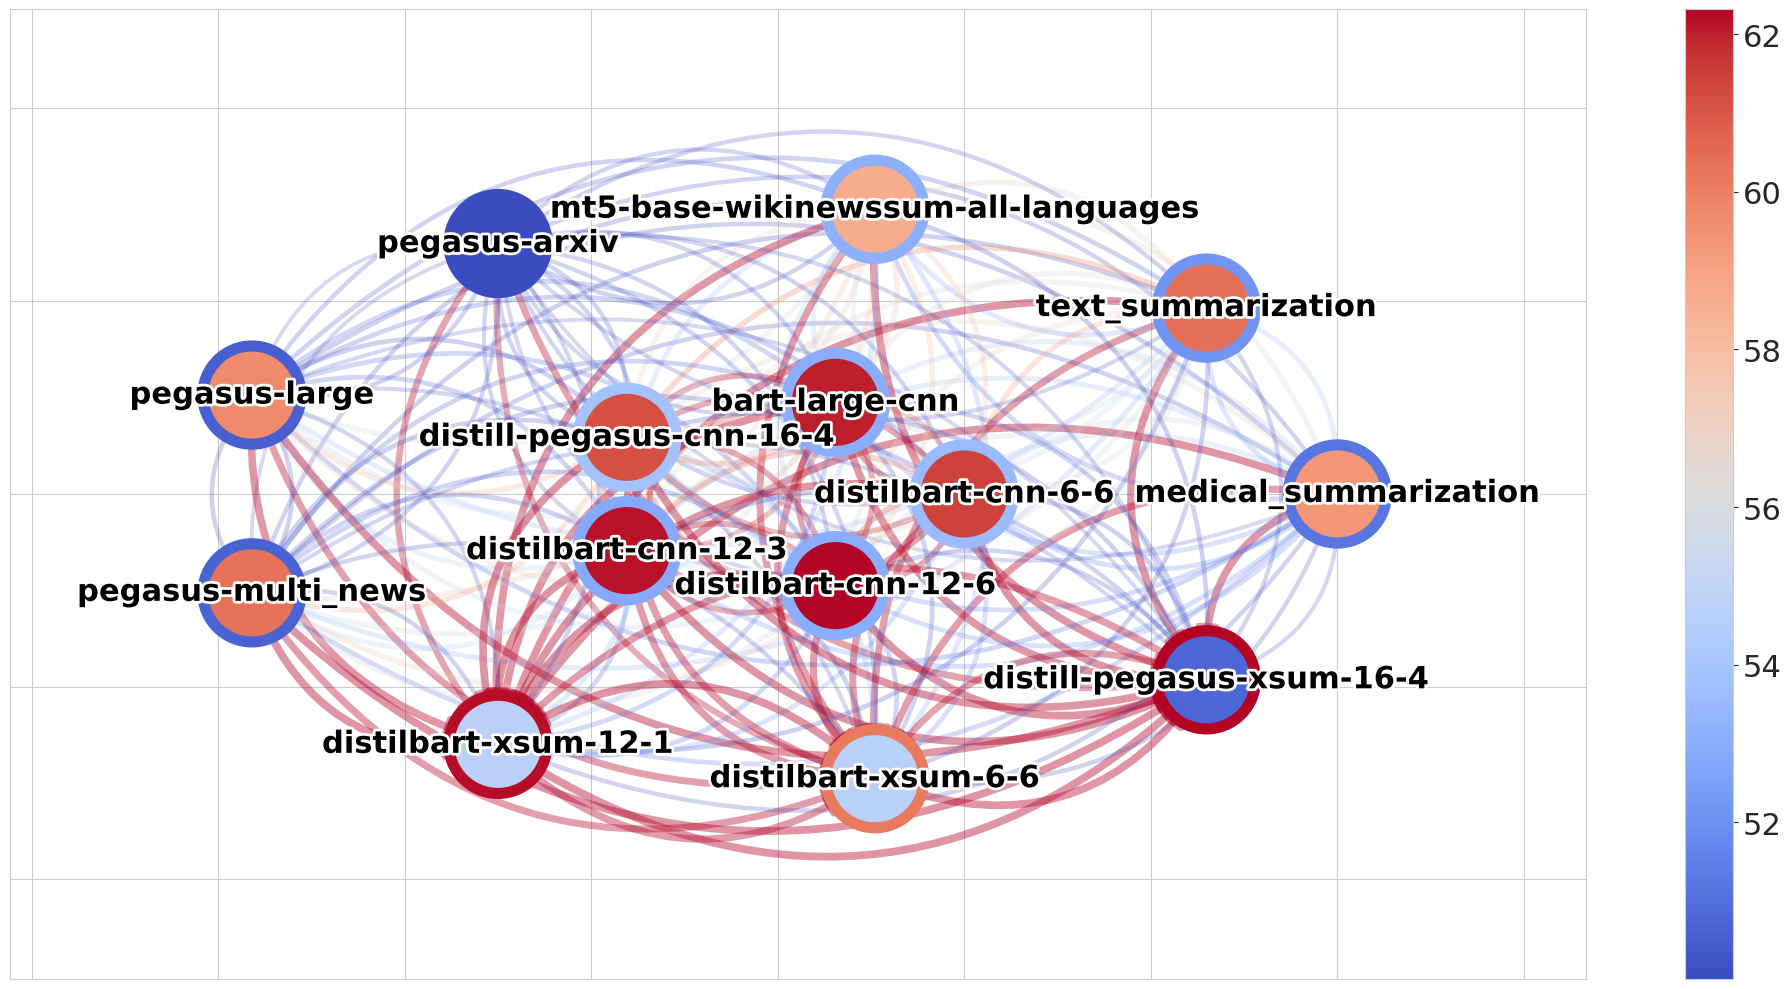

In [15]:

# plot graph of models

# make grid dark background
sns.set_style("whitegrid")

cmap =sns.color_palette("coolwarm", as_cmap=True)


table = df.dropna().pivot("metadata/Model name 1", "metadata/Model name 2", "I(summary_1 -> summary_2)").fillna(-0.0)
# remove lines and columns containing xsum in index and columns

# compute 1/x for each value

G= nx.from_pandas_adjacency(table, create_using=nx.DiGraph)
G.remove_edges_from(nx.selfloop_edges(G))





avg_weight = {n : np.mean([d[2]['weight'] for d in G.out_edges(n, data=True)]) for n in G.nodes()}
avg_income = {n : np.mean([d[2]['weight'] for d in G.in_edges(n, data=True)]) for n in G.nodes()}
# remove edge with weighht <= 50
# for edge in list(G.edges(data=True)):
#     if edge[2]['weight'] >= 1/55:
#         G.remove_edge(edge[0], edge[1])


layout = central_community_layout(G, threshold=61)
fig, ax = plt.subplots(figsize=(20, 10))

def make_border_color(strength, cmap, vmin, vmax):
    return cmap((strength - vmin) / (vmax - vmin))


# draw nodes with border color based on avg_income
nx.draw_networkx_nodes(G, layout, node_size=5000, node_color=list(avg_weight.values()), cmap=cmap, vmin=min(avg_weight.values()), vmax=max(avg_weight.values()), ax=ax, linewidths=8, edgecolors=[make_border_color(avg_income[n], cmap, min(avg_income.values()), max(avg_income.values())) for n in G.nodes()])

edge_colors = [d[2]['weight'] for d in G.edges(data=True)]
edge_size = [d[2]['weight']/15 for d in G.edges(data=True)]
alphas = [d[2]['weight']/200 for d in G.edges(data=True)]


nx.draw_networkx_edges(G, layout, width=edge_size, edge_color=edge_colors, edge_cmap=cmap, edge_vmin=min(avg_weight.values()), edge_vmax=max(avg_weight.values()), ax=ax, arrowsize=30, arrowstyle='-|>', alpha=alphas, connectionstyle='arc3, rad = 0.4', min_source_margin=20, min_target_margin=20)

# remove first part of the names split by _
labels = {n : "_".join(n.split('_')[1:]) if "summarization_text" not in n and "summarization_medical" not in n else n  for n in G.nodes() }

# replace the labels

nx.draw_networkx_labels(G, layout, font_size=22, font_color='black', font_weight='bold', ax=ax, labels=labels)


# add cmap legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(avg_weight.values()), vmax=max(avg_weight.values())))
sm._A = []
plt.colorbar(sm, ax=plt.gca())

# make colorbar tick labels bigger
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=22)


# add white contour to all texts in the figure
for text in plt.gca().texts:
    text.set_path_effects([patheffects.Stroke(linewidth=4, foreground='white'), patheffects.Normal()])

plt.tight_layout()
axis = plt.gca()
axis.set_xlim([1.2*x for x in axis.get_xlim()])
axis.set_ylim([1.2*y for y in axis.get_ylim()])
plt.tight_layout()
# save figure
path = f"../../../papers/Mutual-information-for-summarization/img/crossmisgraph.png"
plt.tight_layout()
plt.savefig(path, bbox_inches='tight', dpi=300)
